## Importing Libraries

In [6]:
import numpy as np
import cv2
import os

## Listing Folders

In [2]:
path = 'MyData'
folders = (os.listdir(path))
no_of_classes = len(folders)

## Loading data in kernel

In [3]:
images = []
classNo = []
x = 0
for folder in folders:
    imageList = os.listdir(path+"/"+folder)
    for img in imageList:
        curImg = cv2.imread(path+"/"+folder+"/"+img)
        curImg = cv2.resize(curImg, (64, 64))
        images.append(curImg)
        classNo.append(x)
    x += 1

print(len(images))

62988


In [4]:
label = []
for folder in folders:
    if len(folder) == 2:
        label.append(folder[-1])
    else:
        label.append(folder)

In [5]:
labelmapping = {}
for x in range(0, len(label)):
    labelmapping[x] = label[x]

labelmapping

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'A',
 11: 'B',
 12: 'C',
 13: 'D',
 14: 'E',
 15: 'F',
 16: 'G',
 17: 'H',
 18: 'I',
 19: 'J',
 20: 'K',
 21: 'L',
 22: 'M',
 23: 'N',
 24: 'O',
 25: 'P',
 26: 'Q',
 27: 'R',
 28: 'S',
 29: 'T',
 30: 'U',
 31: 'V',
 32: 'W',
 33: 'X',
 34: 'Y',
 35: 'Z',
 36: 'a',
 37: 'b',
 38: 'c',
 39: 'd',
 40: 'e',
 41: 'f',
 42: 'g',
 43: 'h',
 44: 'i',
 45: 'j',
 46: 'k',
 47: 'l',
 48: 'm',
 49: 'n',
 50: 'o',
 51: 'p',
 52: 'q',
 53: 'r',
 54: 's',
 55: 't',
 56: 'u',
 57: 'v',
 58: 'w',
 59: 'x',
 60: 'y',
 61: 'z'}

In [6]:
classNo[-1]

61

In [7]:
len(classNo)

62988

## Converting images list into numpy array

In [8]:
images = np.array(images)
classlabel = np.array(classNo)

In [9]:
classlabel

array([ 0,  0,  0, ..., 61, 61, 61])

## Splitting Data

In [10]:
from sklearn.model_selection import train_test_split

test_ratio = 0.2
x_train, x_test, y_train, y_test = train_test_split(images, classlabel, test_size = test_ratio)

In [11]:
print(x_train.shape, x_test.shape)

(50390, 64, 64, 3) (12598, 64, 64, 3)


In [12]:
# data for validation
val_ratio = 0.2
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size = val_ratio)

In [13]:
print(x_train.shape, x_validation.shape)

(40312, 64, 64, 3) (10078, 64, 64, 3)


## Number of images for training for each class 

In [14]:
y_train

array([60, 30, 54, ..., 61, 12, 39])

In [15]:
numOfSamples= []
for x in range(0, 61):
    numOfSamples.append(len(np.where(y_train == x)[0]))
print(numOfSamples)

[647, 676, 670, 639, 655, 620, 655, 660, 654, 666, 639, 654, 636, 670, 653, 645, 655, 650, 622, 646, 647, 654, 620, 646, 627, 676, 668, 643, 650, 660, 660, 663, 653, 647, 680, 660, 648, 652, 671, 624, 642, 668, 653, 668, 644, 655, 672, 633, 653, 639, 639, 628, 639, 638, 636, 665, 668, 670, 665, 609, 645]


In [16]:
y_train

array([60, 30, 54, ..., 61, 12, 39])

## Distribution of Images

In [5]:
import matplotlib.pyplot as plt

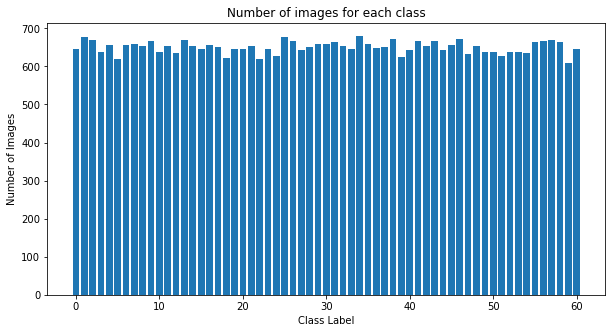

In [18]:
plt.figure(figsize = (10, 5))
plt.bar(range(0, len(numOfSamples)), numOfSamples)
plt.title("Number of images for each class")
plt.xlabel("Class Label")
plt.ylabel("Number of Images")
plt.show()

0 - 9 -> digits (0 - 9)<br>
10 - 35 -> Capital Alphabets (A - Z)<br>
36 - 61 -> Small Alphabets (a -z)

## Image Preprocessing

In [14]:
def preprocessing(img):
    # converting color image to grayscale image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # equilizing the image
    img = cv2.equalizeHist(img)
    # normalizing the image
    img = img / 255
    # return preprocessed imgage
    return img

In [20]:
# preprocessing the dataset
x_train = np.array(list(map(preprocessing, x_train)))
x_validation = np.array(list(map(preprocessing, x_validation)))
x_test = np.array(list(map(preprocessing, x_test)))

In [21]:
# adding depth to images
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_validation = x_validation.reshape(x_validation.shape[0], x_validation.shape[1], x_validation.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

## Building Model using Convolution Neural Network 

In [3]:
import tensorflow

In [4]:
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import OneHotEncoder
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [24]:
dataGen = ImageDataGenerator(width_shift_range = 0.1,
                             height_shift_range = 0.1,
                             zoom_range = 0.2,
                             shear_range = 0.1,
                             rotation_range = 10)

In [25]:
dataGen.fit(x_train)

In [26]:
y_train

array([60, 30, 54, ..., 61, 12, 39])

In [27]:
from keras.utils.np_utils import to_categorical

In [28]:
y_train = to_categorical(y_train, len(folders))
y_test = to_categorical(y_test, len(folders))
y_validation = to_categorical(y_validation, len(folders))

In [29]:
y_train

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [58]:
def myModel():
    no_of_filters = 60
    size_of_filter1 = (5, 5)
    size_of_filter2 = (3, 3)
    size_of_pool = (2, 2)
    no_of_nodes = 128 
    
    model=Sequential()
    model.add(Conv2D(no_of_filters, size_of_filter1, input_shape=(64, 64, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size= size_of_pool))
    model.add(Conv2D(no_of_filters//2, size_of_filter2, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
        
    model.add(Flatten())
    model.add(Dense(no_of_nodes,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(62,activation='softmax'))
    
    model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [59]:
model = myModel()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 60, 60, 60)        1560      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 30, 30, 60)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 30)        16230     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 30)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 5880)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               752768    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

In [60]:
print(len(x_train), len(x_validation))

40312 10078


In [61]:
batch = 32
epoch = 15
steps_per_epoch = 1250

In [62]:
history = model.fit_generator(dataGen.flow(x_train, y_train, batch_size = batch),
                                 steps_per_epoch = steps_per_epoch,
                                 epochs = epoch,
                                 validation_data = (x_validation, y_validation),
                                 shuffle=1)

Epoch 1/15
1250/1250 [==============================] - 278s 223ms/step - loss: 1.9932 - accuracy: 0.4509 - val_loss: 0.6393 - val_accuracy: 0.8007
Epoch 2/15
1250/1250 [==============================] - 290s 232ms/step - loss: 1.0751 - accuracy: 0.6674 - val_loss: 0.5384 - val_accuracy: 0.8191
Epoch 3/15
1250/1250 [==============================] - 282s 225ms/step - loss: 0.9137 - accuracy: 0.7058 - val_loss: 0.5074 - val_accuracy: 0.8239
Epoch 4/15
1250/1250 [==============================] - 322s 258ms/step - loss: 0.8348 - accuracy: 0.7311 - val_loss: 0.4738 - val_accuracy: 0.8359
Epoch 5/15
1250/1250 [==============================] - 315s 252ms/step - loss: 0.7866 - accuracy: 0.7397 - val_loss: 0.4522 - val_accuracy: 0.8370
Epoch 6/15
1250/1250 [==============================] - 314s 252ms/step - loss: 0.7431 - accuracy: 0.7499 - val_loss: 0.4345 - val_accuracy: 0.8418
Epoch 7/15
1250/1250 [==============================] - 288s 230ms/step - loss: 0.7158 - accuracy: 0.7589 - val_

## Ploting the Result

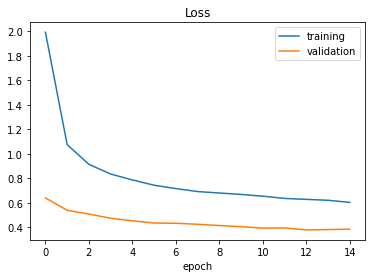

In [63]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Loss')
plt.xlabel('epoch')
plt.show()

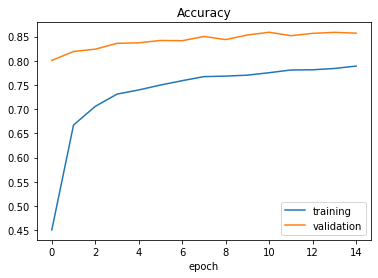

In [64]:
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.show()

In [65]:
model_test_score = model.evaluate(x_test, y_test, verbose=0)
print('Test Score = ', model_test_score[0])
print('Test Accuracy =', model_test_score[1])

Test Score =  0.3849438726902008
Test Accuracy = 0.854341983795166


In [66]:
model.save("ocr_model_bs32_ep10.h5")

In [1]:
arr_out = []
arr_result = ['0','1','2','3','4','5','6','7','8','9',
              'A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z',
              'a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z',]

In [7]:
model=load_model('ocr_model_bs32_ep10.h5')